# Evaluate the classDetect Method and produce ROC curves
purpose:  to rank models according to metrics

In [1]:
import os
from glob import glob
import json
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc
from scipy import interp
import matplotlib.pyplot as plt
import pickle
import sys

In [2]:
pickleDir = './pickle'
pickleDir = '.'
#assert os.path.exists(pickleDir), "Specified directory of pickle files does not exist!"

In [3]:
#pickleFiles = glob(pickleDir + '/*.pickle')
pickleFiles = glob(pickleDir + '/*.pickle')
len(pickleFiles)

1

In [5]:
pwd

'/Users/rexbarker/BFH/CAS_PML/Project/DeepFashion/classDetectKinli'

In [8]:
cl_sel = {d:i for i,d in enumerate(sorted(os.listdir('../fashion_data_class/val/')))}
sel_cl = [i for i in sorted(cl_sel.keys())]
cl_color = dict(zip(cl_sel.keys(),['blue', 'green', 'red', 'cyan', 'maroon', 'yellow', 'orange', 'violet','pink']))

In [9]:
cl_color

{'Blazer': 'blue',
 'Blouse': 'green',
 'Cardigan': 'red',
 'Hoodie': 'cyan',
 'Jacket': 'maroon',
 'Sweater': 'yellow',
 'Tank': 'orange',
 'Tee': 'violet',
 'Top': 'pink'}

In [10]:
allResults = {}
for f in pickleFiles:
    with open(f,'rb') as fp:
        y_true,y_test = pickle.load(fp)
    allResults[f] = [y_true,y_test]

In [11]:
#f1 = pickleFiles[0]
#f2 = pickleFiles[1]
#f3 = pickleFiles[3]

In [12]:
k,res = list(allResults.items())[0]

In [13]:
allROC = {}
for f,res in allResults.items():
    # Compute ROC curve and ROC area for each class
    y_true,y_test = res
    assert y_true.shape == y_test.shape, f"Incompatible size for y_true,y_pred of f={f}"
    n_classes = y_true.shape[1]
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_test[:, i])
        assert fpr[i].shape == tpr[i].shape, f"Incompatible size for fpr and tpr f={f}, i={i}"
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_test.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Compute the macro average ROC and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    allROC[f] = [fpr,tpr,roc_auc]
    

In [14]:
#for f,things in allROC.items():
#    fpr,tpr,roc_auc = things
#    for k in fpr.keys():
#        print(f'for f[k]={f}[{k}], fpr.shape={fpr[k].shape}, tpr.shape={tpr[k].shape}')

In [15]:
fpr,tpr,roc_auc = allROC[f]

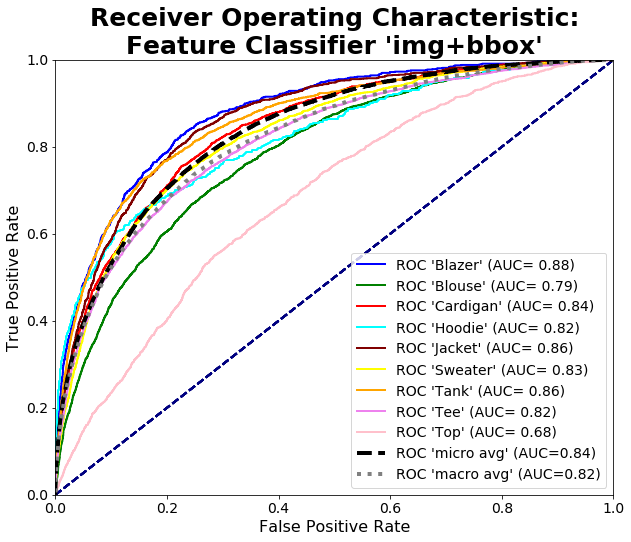

In [23]:
lw = 2
for f,res in allROC.items():
    fpr,tpr,roc_auc = res
    fig = plt.figure(figsize=(10,8))
    for i in range(n_classes):    
        cl_name = sel_cl[i]
        plt.plot(fpr[i], tpr[i], color=cl_color[cl_name],
                 lw=lw, label=f'ROC \'{cl_name}\' (AUC= {roc_auc[i]:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])

    plt.plot(fpr['micro'],tpr['micro'],color='black',
             lw=4,label=f'ROC \'micro avg\' (AUC={roc_auc["micro"]:0.2f})',
             linestyle='--')
        
    plt.plot(fpr['macro'],tpr['macro'],color='grey',
         lw=4,label=f'ROC \'macro avg\' (AUC={roc_auc["macro"]:0.2f})',
         linestyle=':')
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title("Receiver Operating Characteristic:\nFeature Classifier 'img+bbox'",fontsize=25,fontweight='bold')
    #plt.suptitle(f,fontsize=12)
    plt.legend(loc="lower right",fontsize=14)
    plt.show()

In [21]:
cl_color

{'Blazer': 'blue',
 'Blouse': 'green',
 'Cardigan': 'red',
 'Hoodie': 'cyan',
 'Jacket': 'maroon',
 'Sweater': 'yellow',
 'Tank': 'orange',
 'Tee': 'violet',
 'Top': 'pink'}

In [22]:
cl_sel.keys()

dict_keys(['Blazer', 'Blouse', 'Cardigan', 'Hoodie', 'Jacket', 'Sweater', 'Tank', 'Tee', 'Top'])

In [23]:
for f,res in allROC.items():
    fpr,tpr,roc_auc = res
    print(f"for f={f}, roc_auc={roc_auc['micro']}")

for f=./model_20190324_0035.pickle, roc_auc=0.8367047892725227
